# PAS

## Number of cities
- 2
- 3
- 4 (?)

## Moving
- next city
- biggest city
- smallest city
- no movement (no I/E)

## Conditions
- no population cap
- disasters (when pop[i] > 100, pop[i] reduced to 10)

## Analysis
- graphs of Birth, Immigration, Death, Emigration for all population
- abundance graph
- population graph (+ SD)
- total population graph (+ SD)

# Load all datasets
Load all the datasets related to Birth, Immigration, Death, Emigration, Population and total Population and give names to the columns.

In [77]:
import pandas as pd
import os

n_cities = 3
species = 'BIDEP'
n_species = len(species)
results_folder = 'results'
data = [n_species*[None] for i in range(n_cities)]
columns = ['Time', 'Mean', 'SD', 'CI']
pop_tot = pd.read_csv(filepath_or_buffer=os.path.join(results_folder, 'lifepop_tot{}.csv'), sep=',', names=columns, header=None)

for i in range(n_cities):
    for s in range(n_species):
        data[i][s] = pd.read_csv(filepath_or_buffer=os.path.join(results_folder, f'life#{species[s]}[{i}].csv'), sep=',', names=columns, header=None)

# BIDE model equation
N(t+1) = N(t) + B + I - D - E

The abundance at time t+1 is equal to the abundance at time t plus Birth and Immigration, minus Death and Emigration.

For the sake of simplicity, the abundance at time t is assumed to be 0.

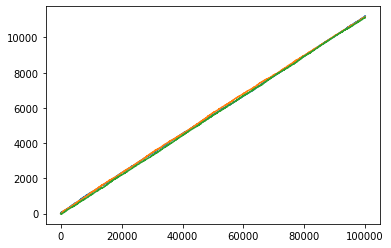

In [78]:
import matplotlib.pyplot as plt

abundance = n_cities*[None]
for i in range(n_cities):
    abundance[i] = data[i][species.index('B')]['Mean'].combine(data[i][species.index('I')]['Mean'], lambda x,y: x+y).combine(data[i][species.index('D')]['Mean'], lambda x,y: x-y).combine(data[i][species.index('E')]['Mean'], lambda x,y: x-y)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    ax.plot(range(len(abundance[i])), abundance[i])

plt.show()

# Population Graph

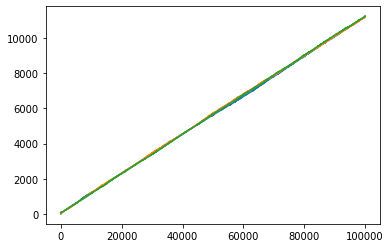

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    ax.plot(data[i][species.index('P')]['Time'], data[i][species.index('P')]['Mean'])

plt.show()

# Population Graph + SD

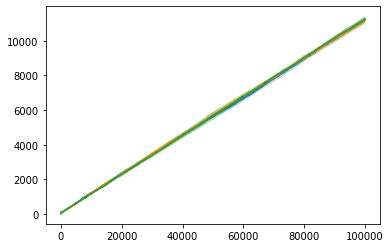

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    time = data[i][species.index('P')]['Time']
    mean = data[i][species.index('P')]['Mean']
    sd = data[i][species.index('P')]['SD']
    ax.plot(time, mean)
    ax.fill_between(time, mean-sd, mean+sd, alpha=0.3)

plt.show()

# Total Population

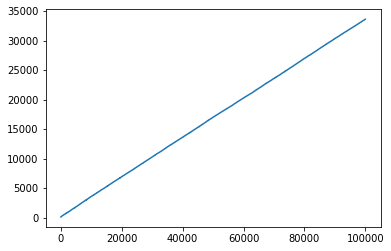

In [81]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
time = pop_tot['Time']
mean = pop_tot['Mean']
ax.plot(time, mean)

plt.show()

# Total Population + SD

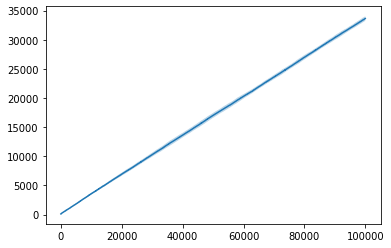

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
time = pop_tot['Time']
mean = pop_tot['Mean']
sd = pop_tot['SD']
ax.plot(time, mean)
ax.fill_between(time, mean-sd, mean+sd, alpha=0.3)

plt.show()

# Geometric Population

https://en.wikipedia.org/wiki/Population_dynamics#Geometric_populations

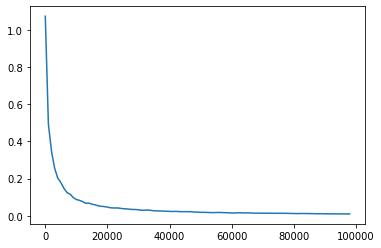

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
time = pop_tot['Time']
mean = pop_tot['Mean']
interval = 1000
group_mean = mean.groupby(mean.index // interval).mean()
new_mean = pd.DataFrame([group_mean[i+1] / group_mean[i] for i in range(group_mean.size-1)], columns=['']) # tends to 1.01
new_mean2 = pd.DataFrame([(group_mean[i+1] - group_mean[i])/group_mean[i] for i in range(group_mean.size-1)], columns=['']) # tends to 0.01
new_time = pd.DataFrame([time[i*interval] for i in range(time.size//interval-1)], columns=[''])
ax.plot(new_time, new_mean2)

plt.show()